In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import itertools
import numpy as np
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
from operator import itemgetter

mpl.rc('figure', facecolor='white')
mpl.rc('xtick', labelsize=14, color="#222222", direction='out') 
mpl.rc('ytick', labelsize=14, color="#222222", direction='out') 
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

def cleanup_chart_junk(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    return ax

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


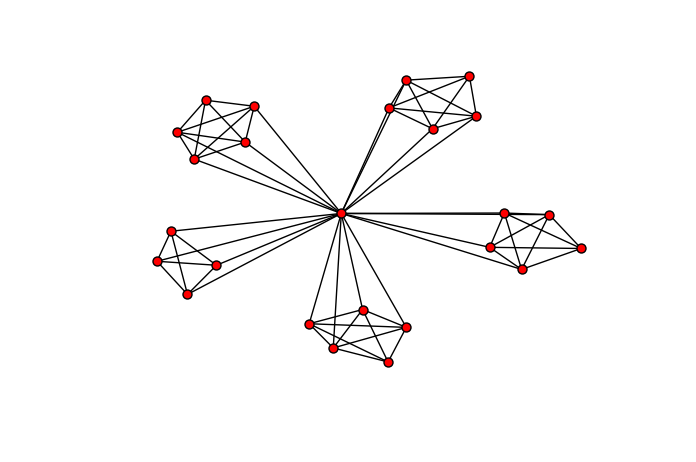

In [7]:
def hierarchical_graph(i=1):
    # Cliques are defined as complete graphs, N=5, with all but one peripheral node.
    clique = nx.complete_graph(5)
    for node in clique.nodes():
        clique.node[node]['peripheral'] = False if node == 0 else True
	
    # The seed of our graph is a clique.
    G = clique.copy()
    
    # Every iteration
    for _ in range(i):
        G = nx.disjoint_union_all([G, *itertools.repeat(clique, 4)])
        G.add_edges_from([(0, node) for node in G.nodes() if G.node[node]['peripheral'] == True ])
        clique = G.copy()
    return G

nx.draw(hierarchical_graph(1), pos=nx.spring_layout(hierarchical_graph(1)), node_size=42)

In [8]:
np.random.seed(1)
N_BA = 1e4
i = 5

BA_C = nx.barabasi_albert_graph(N_BA, m=10)
BA_k = BA_C.copy()
HA_C = hierarchical_graph(i)
HA_k = HA_C.copy()

In [9]:
N_BA_C = []
N_BA_k = []

for x in range(1, len(BA_C)):
    # Remove node with highest clustering coefficient
    node = sorted(BA_C.degree().items(), key=itemgetter(1), reverse=True)[0][0]
    BA_C.remove_node(node)
    
    # Remove node with highest degree k
    node = sorted(nx.clustering(BA_k).items(), key=itemgetter(1), reverse=True)[0][0]
    BA_k.remove_node(node)
    
    # Record size of largest connected component
    N_BA_C.append(len(sorted(nx.connected_components(BA_C), key=len, reverse=True)[0]))
    N_BA_k.append(len(sorted(nx.connected_components(BA_k), key=len, reverse=True)[0]))

In [13]:
N_HA_C = []
N_HA_k = []

for x in range(1, len(HA_k)):
    # Remove node with highest clustering coefficient
    node = sorted(HA_C.degree().items(), key=itemgetter(1), reverse=True)[0][0]
    HA_C.remove_node(node)
    
    # Remove node with highest degree k
    node = sorted(nx.clustering(HA_k).items(), key=itemgetter(1), reverse=True)[0][0]
    HA_k.remove_node(node)
    
    # Record size of largest connected component
    N_HA_C.append(len(sorted(nx.connected_components(HA_C), key=len, reverse=True)[0]))
    N_HA_k.append(len(sorted(nx.connected_components(HA_k), key=len, reverse=True)[0]))

In [ ]:
print(N_HA_C)

In [ ]:
print(N_HA_k)

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

data = [N_BA_C, N_BA_k, N_HA_C, N_HA_k,]
labels = ['Barabasi-Albert', 'Barabasi-Albert', 'Hierarchichal', 'Hierarchichal']
styles = itertools.cycle(['Highest Clustering Coefficient', 'Highest Degree $k$'])
sizes = itertools.cycle([N, N_HA])

for ax, y, label, style, size in zip(axes.flatten(), data, labels, styles, sizes):
    ax = cleanup_chart_junk(ax)
    ax.set_ylabel('Size of Largest Component')
    ax.set_title(label + ' Connected Component after\n' + style + ' Node Removal')
    ax.plot([x / size for x in range(0, len(y))], y, color='red')

for j in [0, 1]:
    axes[1, j].set_xlabel('Proportion of Nodes Removed')
fig.tight_layout()